### Challenge 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import SequenceMatcher
import re
import geopandas as geo

%matplotlib inline

### Loading data

In [38]:
df_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt')
df_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt')
df_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190406.txt')
df_4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190413.txt')
df_5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190420.txt')
df_6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190427.txt')
df_7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df_8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df_9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df_10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df_12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df_13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt')
df_14 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt')


Mta_2019_df_input_1 = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10])
mta_df = pd.concat([Mta_2019_df_input_1, df_10, df_11, df_12, df_13, df_14])

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


### Stripping spaces from column names

In [39]:
mta_df.columns = [column.strip() for column in mta_df.columns]

### Dividing up all stations by line (result is that station names are station-line)

In [40]:
mta_df['STATION'] = mta_df['STATION'] + ' ' + mta_df['LINENAME']

mta_df['STATION'] = [name.strip() for name in mta_df['STATION']]

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


### Challenge 2

### Adding date_time column

In [41]:
# mta_df["DATETIME"] = pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'])

mta_df["DATETIME"] = pd.to_datetime(mta_df["DATE"] + " " + mta_df["TIME"], format="%m/%d/%Y %H:%M:%S")

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00


### Challenge 3

### Adding turnstile column

In [42]:
# Adding turnstile column

mta_df['TURNSTILE'] = mta_df['C/A'] + ' ' + mta_df['UNIT'] + ' ' + mta_df['SCP'] + ' ' + mta_df['STATION']

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00,A002 R051 02-00-00 59 ST NQR456W
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00,A002 R051 02-00-00 59 ST NQR456W


In [43]:
# Checking that turnstile combos are really unique:

(mta_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
1093003,N306,R017,00-00-01,LEXINGTON AV/53 EM6,2019-05-23 04:00:00,2
912822,N120A,R153,01-05-01,UTICA AV AC,2019-05-19 13:00:00,2
1177826,N330,R202,00-00-02,63 DR-REGO PARK MR,2019-05-23 12:00:00,2
1177827,N330,R202,00-00-02,63 DR-REGO PARK MR,2019-05-23 16:00:00,2
1177828,N330,R202,00-00-02,63 DR-REGO PARK MR,2019-05-23 20:00:00,2
912813,N120A,R153,01-05-01,UTICA AV AC,2019-05-18 01:00:00,2
912814,N120A,R153,01-05-01,UTICA AV AC,2019-05-18 05:00:00,2
912815,N120A,R153,01-05-01,UTICA AV AC,2019-05-18 09:00:00,2
912816,N120A,R153,01-05-01,UTICA AV AC,2019-05-18 13:00:00,2
912817,N120A,R153,01-05-01,UTICA AV AC,2019-05-18 17:00:00,2


In [44]:
# Remove duplicates

mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)

mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

mta_df.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
207476,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,21:00:00,REGULAR,5554,379,2019-06-21 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207475,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,17:00:00,REGULAR,5554,379,2019-06-21 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207474,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,13:00:00,REGULAR,5554,379,2019-06-21 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207473,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,09:00:00,REGULAR,5554,379,2019-06-21 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207472,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,05:00:00,REGULAR,5554,379,2019-06-21 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207471,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/21/2019,01:00:00,REGULAR,5554,379,2019-06-21 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207470,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/20/2019,21:00:00,REGULAR,5554,379,2019-06-20 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207469,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/20/2019,17:00:00,REGULAR,5554,379,2019-06-20 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207468,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/20/2019,13:00:00,REGULAR,5554,379,2019-06-20 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R
207467,TRAM2,R469,00-05-01,RIT-ROOSEVELT R,R,RIT,06/20/2019,09:00:00,REGULAR,5554,379,2019-06-20 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT R


In [45]:
turnstiles_daily = (mta_df
                        .groupby(["DATE", "TURNSTILE", ],as_index=False)
                        .ENTRIES.first())

# turnstiles_overall = (mta_df
#                         .groupby(["TURNSTILE", "DATE", "DATETIME"],as_index=False)
#                         .sum())

mta_daily = (mta_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)  #do not group by turnstile!! That will screw up box plot later
                        .ENTRIES.first())


### Adding previous date and entries columns

In [46]:
mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily
                                                .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                .apply(lambda grp: grp.shift(1)))

/Users/Julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [47]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST NQR456W,03/16/2019,6981415,NaN,NaN
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0


### Drop the rows for the earliest date in the df


In [48]:
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0


### Counters in reverse?

In [49]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
7653,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/17/2019,1238616553,03/16/2019,1.238619e+09
7654,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/18/2019,1238612634,03/17/2019,1.238617e+09
7655,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/19/2019,1238608594,03/18/2019,1.238613e+09
7656,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/20/2019,1238604518,03/19/2019,1.238609e+09
7657,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/21/2019,1238600427,03/20/2019,1.238605e+09


### Let's see how many stations have this problem


In [50]:
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION                 
A025  R023  01-03-01  34 ST-HERALD SQ BDFMNQRW    97
A037  R170  05-00-00  14 ST-UNION SQ LNQR456W      1
A038  R085  00-00-01  8 ST-NYU NRW                 1
A039  R085  01-00-01  8 ST-NYU NRW                 1
A042  R086  01-00-04  PRINCE ST NRW                1
                                                  ..
R623  R061  00-00-01  NOSTRAND AV 3                2
R629  R065  00-00-00  ROCKAWAY AV 3                1
R645  R110  00-03-00  FLATBUSH AV-B.C 25           1
R646  R110  01-00-01  FLATBUSH AV-B.C 25          97
R730  R431  00-00-04  EASTCHSTER/DYRE 5           93
Length: 575, dtype: int64

### Fixing counter

In [51]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=40000)

In [52]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0,623.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0,1382.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0,1501.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0,1583.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0,1488.0


### Examine distribution

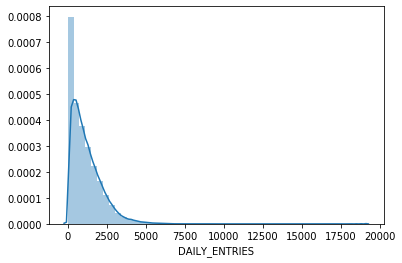

In [53]:
sns.distplot(mta_daily['DAILY_ENTRIES']
             [mta_daily['DAILY_ENTRIES'] < 20000])

### First get daily entries by station

In [54]:
stations_daily = \
(mta_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV L,03/17/2019,2.0
1,1 AV L,03/18/2019,16141.0
2,1 AV L,03/19/2019,19515.0
3,1 AV L,03/20/2019,19885.0
4,1 AV L,03/21/2019,20484.0


### Filter outliers (200k)

In [55]:
# outlier_mask = (mta_daily['DAILY_ENTRIES']<=10000)
# stations_daily = mta_daily[outlier_mask]

# stations_daily.head()

### Then get top 10 stations by daily volume 

In [56]:
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

313           GRD CNTRL-42 ST 4567S
90         34 ST-HERALD SQ BDFMNQRW
103    42 ST-PORT AUTH ACENQRS1237W
94               34 ST-PENN STA ACE
28          14 ST-UNION SQ LNQR456W
449     TIMES SQ-42 ST 1237ACENQRSW
124            59 ST COLUMBUS ABCD1
303              FULTON ST 2345ACJZ
107             47-50 STS ROCK BDFM
405                  PATH NEW WTC 1
Name: STATION, dtype: object

### Next create a new df that filters the stations daily data down to the top 10

In [57]:
station_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)].sort_values(by = 'DAILY_ENTRIES', ascending = False)

In [58]:
station_daily_top10.head()

,STATION,DATE,DAILY_ENTRIES
39068,PATH NEW WTC 1,06/04/2019,184628.0
30229,GRD CNTRL-42 ST 4567S,06/18/2019,175072.0
30209,GRD CNTRL-42 ST 4567S,05/29/2019,174191.0
30140,GRD CNTRL-42 ST 4567S,03/21/2019,173299.0
30210,GRD CNTRL-42 ST 4567S,05/30/2019,171505.0


### Plot top 10

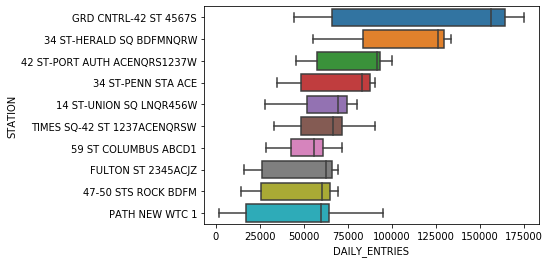

In [59]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', data=station_daily_top10, order = top10_stations, \
            showfliers = False);

### Challenge 4

In [60]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0,623.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0,1382.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0,1501.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0,1583.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0,1488.0


In [61]:
# by turnstile with daily entries

# mta_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DAILY_ENTRIES'].sum().reset_index()

mta_daily['TURNSTILE'] = mta_daily['C/A'] + ' ' + mta_daily['UNIT'] + ' ' + mta_daily['SCP'] + ' ' + mta_daily['STATION']

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST NQR456W
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST NQR456W


In [62]:
mta_daily['TURNSTILE'].value_counts()

H008 R248 01-00-02 1 AV L                   97
J005 R353 00-03-01 LORIMER ST JM            97
N545 R204 01-06-00 CHURCH AV FG             97
R238 R046 00-06-00 GRD CNTRL-42 ST 4567S    97
N103 R127 00-00-01 JAY ST-METROTEC ACF      97
                                            ..
N071 R013 00-03-04 34 ST-PENN STA ACE        1
N071 R013 00-03-03 34 ST-PENN STA ACE        1
N071 R013 00-03-05 34 ST-PENN STA ACE        1
PTH19 R549 02-02-08 NEWARK C 1               1
N071 R013 00-03-02 34 ST-PENN STA ACE        1
Name: TURNSTILE, Length: 4907, dtype: int64

In [66]:
# Getting a single turnstile

mask = mta_daily['TURNSTILE']=='R116 R030 00-06-00 CHAMBERS ST 123'  # use this if organizing by station+line

one_turn = mta_daily[mask]

one_turn.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
305854,R116,R030,00-06-00,CHAMBERS ST 123,03/17/2019,9550118,03/16/2019,9549778.0,340.0,R116 R030 00-06-00 CHAMBERS ST 123
305855,R116,R030,00-06-00,CHAMBERS ST 123,03/18/2019,9551156,03/17/2019,9550118.0,1038.0,R116 R030 00-06-00 CHAMBERS ST 123
305856,R116,R030,00-06-00,CHAMBERS ST 123,03/19/2019,9552315,03/18/2019,9551156.0,1159.0,R116 R030 00-06-00 CHAMBERS ST 123
305857,R116,R030,00-06-00,CHAMBERS ST 123,03/20/2019,9553523,03/19/2019,9552315.0,1208.0,R116 R030 00-06-00 CHAMBERS ST 123
305858,R116,R030,00-06-00,CHAMBERS ST 123,03/21/2019,9554683,03/20/2019,9553523.0,1160.0,R116 R030 00-06-00 CHAMBERS ST 123


In [67]:
# Making new grouped frame by day

one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()

# one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()


one_turn_daily.head()

,TURNSTILE,DATE,DAILY_ENTRIES
0,R116 R030 00-06-00 CHAMBERS ST 123,03/17/2019,340.0
1,R116 R030 00-06-00 CHAMBERS ST 123,03/18/2019,1038.0
2,R116 R030 00-06-00 CHAMBERS ST 123,03/19/2019,1159.0
3,R116 R030 00-06-00 CHAMBERS ST 123,03/20/2019,1208.0
4,R116 R030 00-06-00 CHAMBERS ST 123,03/21/2019,1160.0


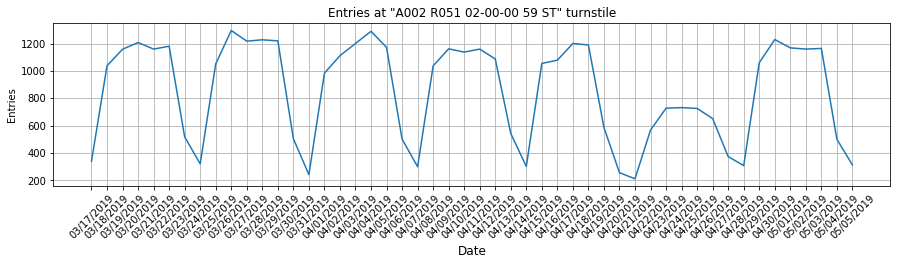

In [68]:
# Plotting one turnstile by day for 50 days

x = one_turn_daily['DATE'][:50]
y = one_turn_daily['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.grid()
plt.xlabel('Date', size = 12)
plt.ylabel('Entries')
plt.xticks(rotation=45)
plt.title('Entries at {} turnstile'.format('"A002 R051 02-00-00 59 ST"'));


### Challenge 5

In [69]:
# Grouping by station

# CA_U_S = turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum()

CA_U_S = mta_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE'], as_index = False).sum()

CA_U_S.head()

,C/A,UNIT,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,59 ST NQR456W,03/17/2019,54633815,54627558.0,6257.0
1,A002,R051,59 ST NQR456W,03/18/2019,54645862,54633815.0,12047.0
2,A002,R051,59 ST NQR456W,03/19/2019,54658997,54645862.0,13135.0
3,A002,R051,59 ST NQR456W,03/20/2019,54672404,54658997.0,13407.0
4,A002,R051,59 ST NQR456W,03/21/2019,54685633,54672404.0,13229.0


### Challenge 6

In [70]:
# Grouping by station

# stations_daily = turnstiles_daily.groupby(['STATION', 'DATE']).sum()

stations_grouped_df = mta_daily.groupby(['STATION', 'DATE'], as_index = False).sum()

stations_grouped_df.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV L,03/17/2019,1412586441,1.412586e+09,2.0
1,1 AV L,03/18/2019,1412602582,1.412586e+09,16141.0
2,1 AV L,03/19/2019,1412622097,1.412603e+09,19515.0
3,1 AV L,03/20/2019,1412641982,1.412622e+09,19885.0
4,1 AV L,03/21/2019,1412662466,1.412642e+09,20484.0


In [71]:
stations_grouped_df['STATION'].value_counts()

59 ST COLUMBUS 1ABCD    97
FOREST AVE M            97
MORRIS PARK 5           97
BROADWAY G              97
MIDDLETOWN RD 6         97
                        ..
5 AVE 7BDFM             92
135 ST 23               91
ORCHARD BEACH 6         31
111 ST J                13
ASTORIA BLVD NQW         2
Name: STATION, Length: 479, dtype: int64

### Challenge 7

In [75]:
# Extracting a single station

mask = stations_grouped_df['STATION'] == '86 ST R'  # Use this if station = station+line above

one_station = stations_grouped_df[mask]

one_station.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
15407,86 ST R,03/17/2019,161592811,161587572.0,5239.0
15408,86 ST R,03/18/2019,161604475,161592811.0,11664.0
15409,86 ST R,03/19/2019,161616501,161604475.0,12026.0
15410,86 ST R,03/20/2019,161628463,161616501.0,11962.0
15411,86 ST R,03/21/2019,161640060,161628463.0,11597.0


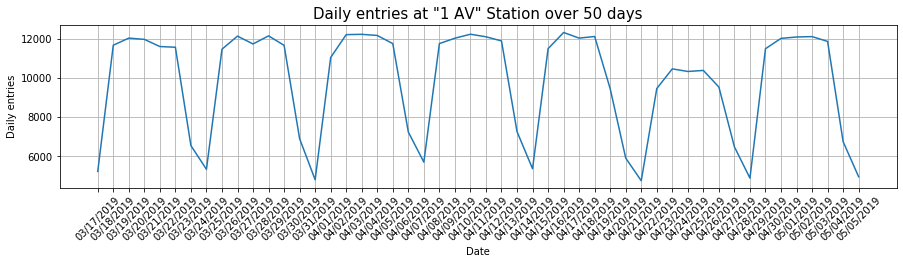

In [76]:
# Plotting daily entries for one station

x = one_station['DATE'][:50]
y = one_station['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.grid()
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Daily entries')
# plt.title('Daily entries at "86 ST  R" Station over 50 days', size=15) # Use this if station = station+line above
plt.title('Daily entries at "1 AV" Station over 50 days', size=15)

plt.xticks(rotation=45);

### Challenge 8

In [77]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST NQR456W
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST NQR456W


In [78]:
# Adding weekday column to mta_daily

mta_daily['WEEK_DAY'] = pd.to_datetime(mta_daily['DATE']).dt.dayofweek

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK_DAY
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST NQR456W,6
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST NQR456W,0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST NQR456W,1
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST NQR456W,2
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST NQR456W,3


Desired: a list of frames; each having daily entries for 1 week

"Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week."

In [83]:
# Making a function to get entries by week

def get_week_list(input_frame, column_name, num_days):
    """
    Loops through dataframe and divides up desired column by increments of number of days (ex: 7 for a week)
    """
    window = 1   # starts at 1 because first day 0 is in second row
    week_list = []
    while window < len(input_frame)-num_days:  
        week_list.append(input_frame[column_name][window:window+num_days])  # do NOT double bracket daily entries. Will kill kernel
        window+=num_days
    return week_list

In [85]:
# Testing it

input_frame = mta_daily[mta_daily['STATION'] == '86 ST R']
column_name = 'DAILY_ENTRIES'
num_days = 7

get_week_list(input_frame, column_name, num_days)

[55151    2081.0
 55152    2165.0
 55153    2206.0
 55154    2090.0
 55155    2085.0
 55156    1121.0
 55157     918.0
 Name: DAILY_ENTRIES, dtype: float64,
 55158    2059.0
 55159    2245.0
 55160    2152.0
 55161    2271.0
 55162    2137.0
 55163    1206.0
 55164     828.0
 Name: DAILY_ENTRIES, dtype: float64,
 55165    1931.0
 55166    2268.0
 55167    2262.0
 55168    2186.0
 55169    2083.0
 55170    1148.0
 55171     926.0
 Name: DAILY_ENTRIES, dtype: float64,
 55172    2133.0
 55173    2193.0
 55174    2193.0
 55175    2204.0
 55176    2152.0
 55177    1179.0
 55178     874.0
 Name: DAILY_ENTRIES, dtype: float64,
 55179    2324.0
 55180    3662.0
 55181    2631.0
 55182    2811.0
 55183    2206.0
 55184    1345.0
 55185    1054.0
 Name: DAILY_ENTRIES, dtype: float64,
 55186    2269.0
 55187    2385.0
 55188    2387.0
 55189    2398.0
 55190    2205.0
 55191    1458.0
 55192    1085.0
 Name: DAILY_ENTRIES, dtype: float64,
 55193    2605.0
 55194    3435.0
 55195    2261.0
 55196 

In [86]:
# viewing single entry

get_week_list(input_frame, column_name, num_days)[0]

55151    2081.0
55152    2165.0
55153    2206.0
55154    2090.0
55155    2085.0
55156    1121.0
55157     918.0
Name: DAILY_ENTRIES, dtype: float64

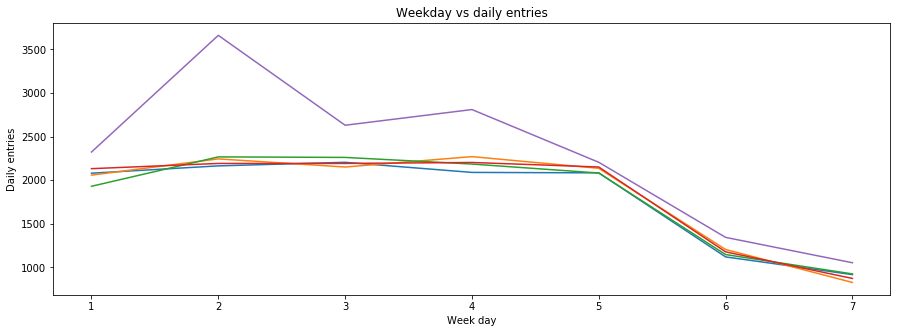

In [87]:
# Plotting

x = np.arange(1,8) # weekdays from 1 to 7
weeks = get_week_list(input_frame, column_name, num_days)

plt.figure(figsize = (15, 5))
plt.xlabel('Week day')
plt.ylabel('Daily entries')
plt.title('Weekday vs daily entries')
for i in weeks[:5]:   # plotting 5 weeks for a single station
    legend_text = []
    plt.plot(x, i);
# plt.legend()

### Including Demographic Information into Our Analysis

In [88]:
# Reads in a csv of stations in high income neighborhoods and saves as a df
bougie_df = pd.read_csv('Income_Stations_by_Neighborhood.csv')
bougie_df.head()

,NEIGHBORHOOD,MAP NAME,MTA DATA SET IDENTIFIER
0,Upper East Side,86 ST-2 AVE 456,86 ST-2 AVE
1,Upper East Side,96 ST-2 AVE 456,96 ST-2 AVE
2,Upper East Side,96 ST Q,96 ST
3,Upper East Side,77 St,77 ST
4,Upper East Side,72 St,72 ST


In [89]:
# Matches station names in bougie_df to the stations_daily dataframe

def get_station_name(row, col_name, station_names, check_length = False):
    """
    Takes in a row of a dataframe and matches the value of the column labeled by 
    col_name with the values in station_names
    """
    row_name = row[col_name]
    row_name = re.sub('th', '', row_name)
    row_name = re.sub('rd', '', row_name)
    row_name = re.sub('nd', '', row_name)
    row_name = re.sub('-', '', row_name).upper()
    similarity = 0
    similar_name = ''
    for name in station_names:
        if check_length:
            if len(name) < 14:
                name += "".join(['-' for i in range(len(name), 14)])
        ratio = SequenceMatcher(None, row_name, name).ratio()
        if ratio > similarity:
            similarity = ratio
            similar_name = name.strip('-')
    return similar_name
bougie_df['MTA_name'] = bougie_df.apply(get_station_name, axis = 1, col_name = "MAP NAME", \
                                        station_names = stations_daily['STATION'].unique())

### Top 10 Busiest Stations in Affluent Neighborhoods

In [90]:
# Takes the df of stations in high income neighborhoods and gets the top 10 busiest
# stations of those stations

bougie_list = bougie_df['MTA_name']
bougie_stations = \
    stations_daily[stations_daily['STATION'].isin(bougie_list)].sort_values(by = 'DAILY_ENTRIES', ascending = False)
bougie_top10 = \
    (bougie_stations.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

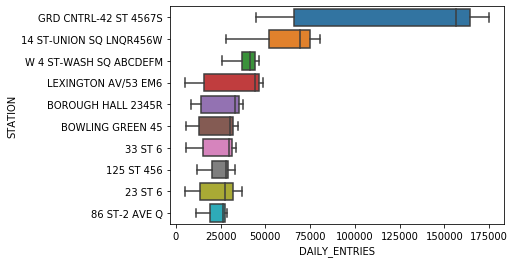

In [91]:
# Generates a box plot showing the top 10 busiest stations in affluent neighborhoods
sns.boxplot(x='DAILY_ENTRIES', y='STATION', \
            data=bougie_stations[bougie_stations['STATION'].isin(bougie_top10)], \
            order = bougie_top10, showfliers = False);

### List of stations in top 10 busiest stations and  in affluent neighborhoods

In [92]:
bougie_list[bougie_list.isin(top10_stations)].tolist()

['GRD CNTRL-42 ST 4567S', '14 ST-UNION SQ LNQR456W']

### Generating maps

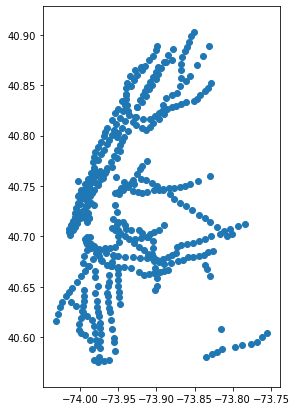

In [94]:
# Generates a geopanda of the stations in NYC and plots it
stations_geo = geo.read_file('Subway_Stations.geojson') 
stations_geo.plot(figsize=(15,7))

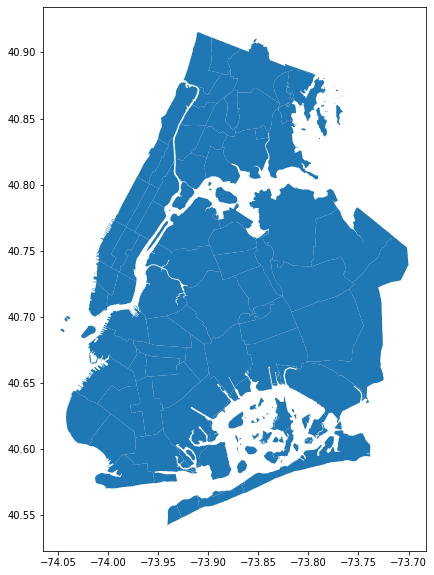

In [97]:
# Generates a geopanda of the map of NYC and plots it, excluding Staten Island
districts_geo = geo.read_file('Districts.geojson') 
districts_geo = districts_geo[districts_geo['boro_cd'].astype(int) <500]
districts_geo.plot(figsize=(10,10))

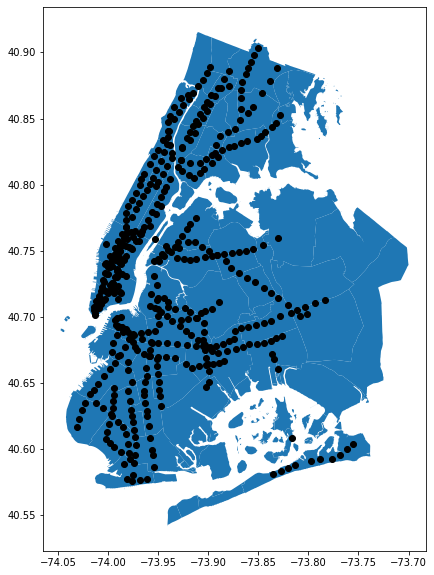

In [98]:
# Overlays the stations on a map of NYC
fig, ax = plt.subplots(1, figsize=(10, 10))
districts_geo.plot(ax=ax)
stations_geo.plot(ax=ax, color = 'black')

In [99]:
# Matches station names in stations_geo to the stations_daily dataframe
stations_geo['Station_line'] = stations_geo['name'] + ' ' + stations_geo['line']
mean_stations_daily = stations_daily.groupby(['STATION',], as_index=False)['DAILY_ENTRIES'].mean()
mean_stations_daily = mean_stations_daily.drop(102)
mean_stations_daily = mean_stations_daily.drop(27)
stations_geo['STATION'] = stations_geo.apply(get_station_name, axis = 1, col_name = 'Station_line', \
                                             station_names = mean_stations_daily['STATION'].unique(), \
                                             check_length = True)

In [100]:
combined_df = pd.merge(stations_geo, mean_stations_daily, on='STATION')
combined_df = combined_df.drop_duplicates(subset=['STATION'])

### Map of All Stations by Average Number of Daily Entries

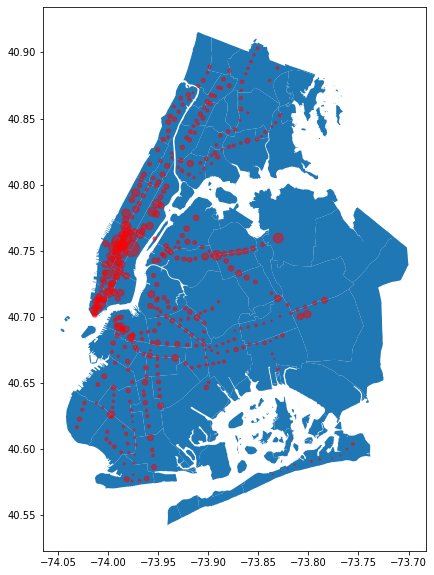

In [101]:
# Overlays the stations on a map of NYC with the size giving the relative average number of
# daily entries at that station.
fig, ax = plt.subplots(1, figsize=(10, 10))
districts_geo.plot(ax=ax)
combined_df.plot(ax=ax, color = 'r',alpha = 1/2, markersize = combined_df['DAILY_ENTRIES']/500)

### Map of Top Ten Stations by Average Number of Daily Entries

In [102]:
top10_stations_geo = combined_df[combined_df['STATION'].isin(top10_stations)]

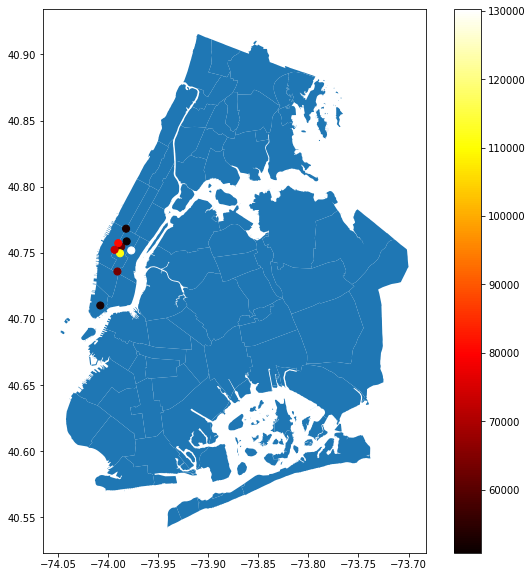

In [106]:
# Overlays the top ten stations on a map of NYC with the color giving the relative average number of
# daily entries at that station.
fig, ax = plt.subplots(1, figsize=(10, 10))
districts_geo.plot(ax=ax)
top10_stations_geo.plot(ax=ax, column = top10_stations_geo['DAILY_ENTRIES'], \
                        legend=True, cmap = 'hot', markersize = 50)

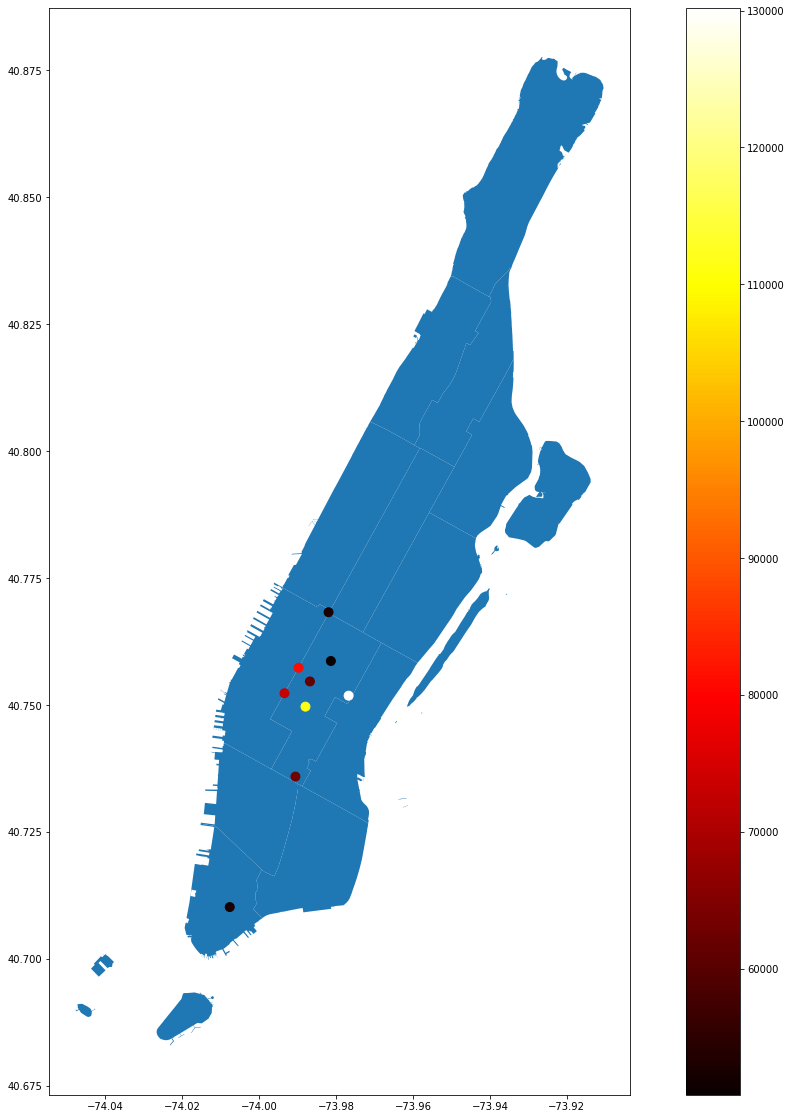

In [105]:
# Same map as above looking only at Manhattan
manhattan = districts_geo[districts_geo['boro_cd'].astype(int) <200]
fig, ax = plt.subplots(1, figsize=(20, 20))
manhattan.plot(ax=ax)
top10_stations_geo.plot(ax=ax, column = top10_stations_geo['DAILY_ENTRIES'], \
                        legend=True, cmap = 'hot', markersize = 80)